# Data preprocessing

In this notebook I'll use (A gentle Introduction to Kaggle)(https://www.kaggle.com/anassbelcaid/start-here-a-gentle-introduction) to learn some basic aspect of data preprocessing for machine learning tasks.

In [1]:
### import the usual stack
import numpy as np
import pandas as pd

# cathegorical data
from sklearn.preprocessing import LabelEncoder

#Operating system
import os

#warning
import warnings
warnings.filterwarnings('ignore')

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Read in the data

First we will list the contents of the `inputs` folder.

In [2]:
print(os.listdir('inputs'))

['application_train.csv', 'application_test.csv']


In [3]:
#reading the training data
app_train = pd.read_csv('inputs/application_train.csv')
print("training data shape",app_train.shape)
app_train.head()

training data shape (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#reading the test data
app_test = pd.read_csv('inputs/application_test.csv')
print("test data shape",app_test.shape)
app_test.head()

test data shape (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory data analysis

Exploratory data analysis (EDA) is an open ended process to computes statistics and draw figures to find trends anomalies and **patterns** in the data.

### Distribution of the target variable
First, we will investigate the ditribution of the *target* variable. the figure of the histogram clearly shows that this is a problem with **unbalanced target**.

In [7]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

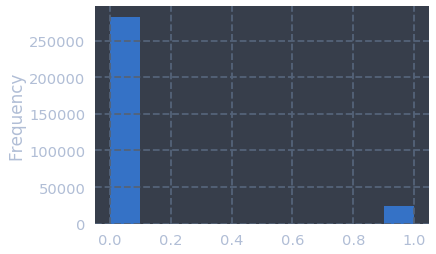

In [8]:
#we could also vizualize the disribution of the target variable
app_train['TARGET'].astype('int').plot.hist()

### Examine missing values

In [9]:
def missing_values_table(df):
    """
    Function to create a statistic table on the missing values of the 
    dataframe df
    """
    
    #count of the missing values
    mis_val = df.isnull().sum()
    #missing value percentage
    mis_val_per = mis_val / len(df)
    
    #making a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_per],axis=1)
    
    # Rename the columns
    mis_val_table = mis_val_table.rename(\
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    #filter null data
    mis_val_table = mis_val_table[mis_val_table.iloc[:,1]!=0]
    
    #sorting assending
    mis_val_table = mis_val_table.sort_values(['% of Total Values'],ascending=False)
    
    return mis_val_table.round(1)
missing_values = missing_values_table(app_train)
print(missing_values)

                              Missing Values  % of Total Values
COMMONAREA_MEDI                       214865                0.7
COMMONAREA_AVG                        214865                0.7
COMMONAREA_MODE                       214865                0.7
NONLIVINGAPARTMENTS_MEDI              213514                0.7
NONLIVINGAPARTMENTS_MODE              213514                0.7
NONLIVINGAPARTMENTS_AVG               213514                0.7
FONDKAPREMONT_MODE                    210295                0.7
LIVINGAPARTMENTS_MODE                 210199                0.7
LIVINGAPARTMENTS_MEDI                 210199                0.7
LIVINGAPARTMENTS_AVG                  210199                0.7
FLOORSMIN_MODE                        208642                0.7
FLOORSMIN_MEDI                        208642                0.7
FLOORSMIN_AVG                         208642                0.7
YEARS_BUILD_MODE                      204488                0.7
YEARS_BUILD_MEDI                      20

### Columns type

Printing the datatype of each column to check categorical data. We could see that there is $16$ object type.

In [10]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

Now we will check the real type of each general `object` type. We could see that most `cathegorical` variables have a small unique entries

In [11]:
app_train.select_dtypes('object').apply(pd.Series.nunique,axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

We can deal with categorical data with two ways:
* **label encoding**: assign a label( integer) to each class.
* **one-hot-encoding**: Create a specefic column for each cathegory. 

We will apply a strategy that uses *label Encoding* for any categorical data with only two values ( we'll use `LabelEncoding` from the sklearn). In the other hand, for a categorical variable with more than two values, we'll use one-hot-encoding with the function `get_dummies(df)`

In [12]:
# Label encoding

le = LabelEncoder()           #Class for label encoding
le_count = 0                  #number of two categorical variables with two values

for col in app_train:
    #test the dtype
    if(app_train[col].dtype=='object'):
        #check the number of the categorical data
        if(len(list(app_train[col].unique()))<=2):
            #transorm the data
            le.fit(app_train[col])
            
            #transform
            app_train[col]=le.transform(app_train[col])
            app_test[col]=le.transform(app_test[col])
            
            le_count += 1
            
print("there were {} cathegorical variables with 2 values".format(le_count))

there were 3 cathegorical variables with 2 values


In [13]:
#one hot encoding for the rest
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print("now the train shape is ",app_train.shape)
print("and the test data shape is",app_test.shape)

now the train shape is  (307511, 243)
and the test data shape is (48744, 239)


### Aligning Training and Testing Data

Creating dummies variables added additional variables in the training data than in the test data. This is due some categorical in the test do not take all the values. We we need to align the `test` and `training`

In [14]:
#saving the target
train_labels = app_train.TARGET

#alinging the tables
app_train, app_test = app_train.align(app_test,join='inner',axis=1)

#target back
app_train['TARGET'] = train_labels
print("now the train shape is ",app_train.shape)
print("and the test data shape is",app_test.shape)



now the train shape is  (307511, 240)
and the test data shape is (48744, 239)


### Back to Exploratory data analysis

#### Anomalies
> One problem  we always want to be on the lookout for when doig EDA is `anomalies` within the data.

One way to suppoert annomalies is by looking at the statistics of a column. using the `describe`. 

In [15]:
(app_train['DAYS_BIRTH']/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

Those look normal. How about the days of employment?

In [16]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

This doesn't look right!!! 
> The maximum value if faar greater than the mean with more than 4 stds

Text(0.5, 0, 'Days Employment')

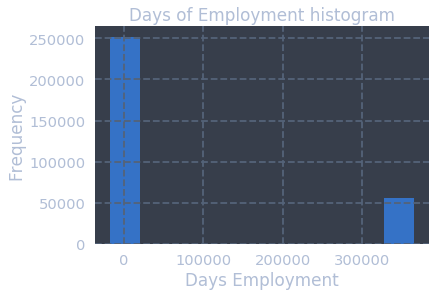

In [17]:
app_train['DAYS_EMPLOYED'].plot.hist(title='Days of Employment histogram')
plt.xlabel('Days Employment')

Just of curiousity, let's subset the anomalous clients and see if they tend to have higher or lower rates.

In [18]:
anom = app_train[app_train['DAYS_EMPLOYED']==365243]
non_anom = app_train[app_train['DAYS_EMPLOYED']!=365243]

print("the non-anomalities default on {:4.2f} of loans"\
      .format(100*non_anom.TARGET.mean()))
print("the anomalies default on {:4.2f} of loans"\
      .format(100*anom.TARGET.mean()))
print("There are {:d} anomalous cases".format(len(anom)))

the non-anomalities default on 8.66 of loans
the anomalies default on 5.40 of loans
There are 55374 anomalous cases


There is multiple way of dealing with anomalies depending on the situation. In our case, they seem to add some values. So we will replace ther columns with *missing_value** but we will add a flag saying this person is an anomalous person ( like the result of a simple classifier).

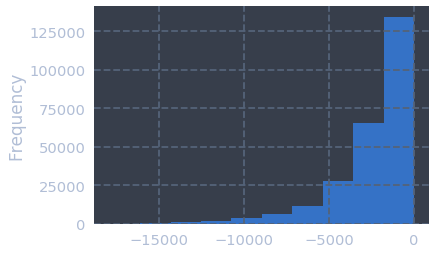

In [19]:
#create the anomalous flag
app_train['DAYS_EMPLOYED_ANOM']= app_train['DAYS_EMPLOYED']==365243

#replace anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243:np.nan},inplace=True)


#new histogram
app_train['DAYS_EMPLOYED'].plot.hist()

In [20]:
#same change to to the test data
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


### Correlations

Interpretation of the values of the corelations:

* 00-.19 “very weak”
* 20-.39 “weak”
* 40-.59 “moderate”
* 60-.79 “strong”
* 80-1.0 “very strong”


In [21]:
#Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()
print('Most positive Correlations:\n',correlations.tail(15))
print("Most Negative Corrrelations:\n",correlations.head(15))

Most positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64
Most Negativ

### Effect of Age on Repayment

We could see that as the client get older, there is a sligher chance that target will  be positive.

In [22]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982712

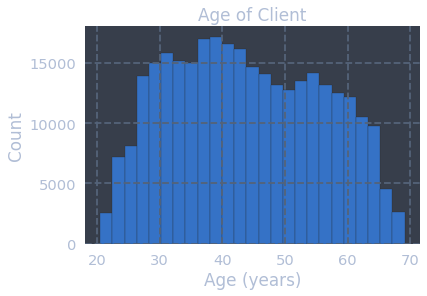

In [23]:
# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');


To visualize the effect of the age on the target, we will next make a `kernel density estimation plot`

Text(0.5, 1.0, 'Distribution of Ages')

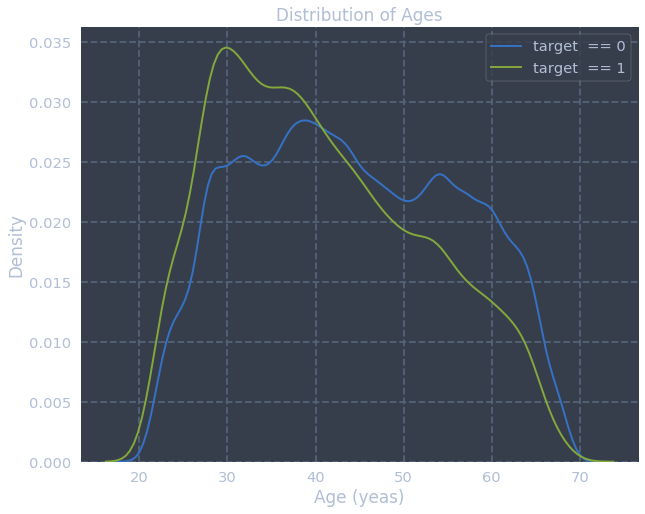

In [24]:
plt.figure(figsize=(10,8))

#KDE plot of loans thatwere repain in time
sns.kdeplot(app_train.loc[app_train['TARGET']==0,'DAYS_BIRTH']/365\
           ,label='target  == 0')

sns.kdeplot(app_train.loc[app_train['TARGET']==1,'DAYS_BIRTH']/365\
           ,label='target  == 1')

plt.xlabel('Age (yeas)'); plt.ylabel('Density'); 
plt.title('Distribution of Ages')

The  **target == 1** curve skews towards the younger end of the ranger. Altough this is not a significant correlation $-0.07. This variable is likely  going to be useful in **machine learning**.

Let's plot the average failure to repay loans by age bracket. To make this plot, first, we cut the age category into bins of 5 years each. then in each bin, we calculate the average value of the target.

In [28]:
# First we make a dataframe containing (age, DAYS-BIRTH)

age_data  = app_train[['TARGET', 'DAYS_BIRTH']]
age_data.DAYS_BIRTH = age_data.DAYS_BIRTH / 365

#bin of the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['DAYS_BIRTH'],\
                                  bins = np.linspace(20,70,num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BINNED
0,1,25.920548,"(25.0, 30.0]"
1,0,45.931507,"(45.0, 50.0]"
2,0,52.180822,"(50.0, 55.0]"
3,0,52.068493,"(50.0, 55.0]"
4,0,54.608219,"(50.0, 55.0]"
5,0,46.413699,"(45.0, 50.0]"
6,0,37.747945,"(35.0, 40.0]"
7,0,51.643836,"(50.0, 55.0]"
8,0,55.065753,"(55.0, 60.0]"
9,0,39.641096,"(35.0, 40.0]"


In [29]:
#Group by the bin and calculate average
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH
YEARS_BINNED,,
"(20.0, 25.0]",0.123036,23.377522
"(25.0, 30.0]",0.111436,27.822518
"(30.0, 35.0]",0.102814,32.479037
"(35.0, 40.0]",0.089414,37.555913
"(40.0, 45.0]",0.078491,42.459346
"(45.0, 50.0]",0.074171,47.462741
"(50.0, 55.0]",0.066968,52.593136
"(55.0, 60.0]",0.055314,57.491131
"(60.0, 65.0]",0.052737,62.412459


Text(0.5, 1.0, 'failure to repay by age groups')

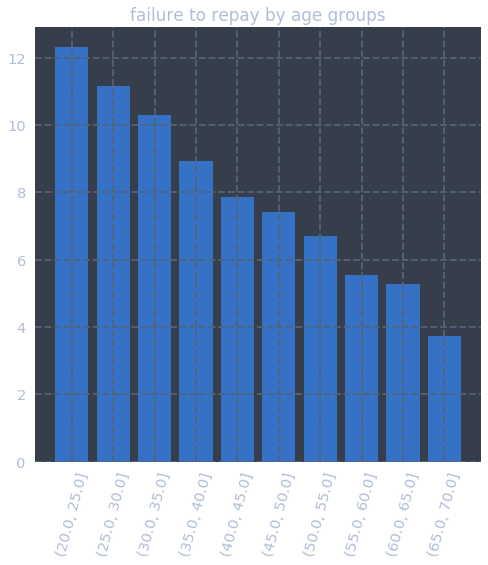

In [32]:
plt.figure(figsize=(8,8))

#Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str),100*age_groups['TARGET'])
plt.xticks(rotation=75)
plt.title('failure to repay by age groups')

This is a clear overview of the loans failure. 
> Younger applicants are more likely to not repay the loan!

### Exterior Sources

The $3$ variables with the strongest negative correlations with the target are

* *EXT_SOURCE_1*
* *EXT_SOURCE_2*
* *EXT_SOURCE_3*


In [34]:
ext_data  = app_train[['TARGET','EXT_SOURCE_1','EXT_SOURCE_2'\
                       ,'EXT_SOURCE_3','DAYS_BIRTH']]

ext_data_corrs  = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

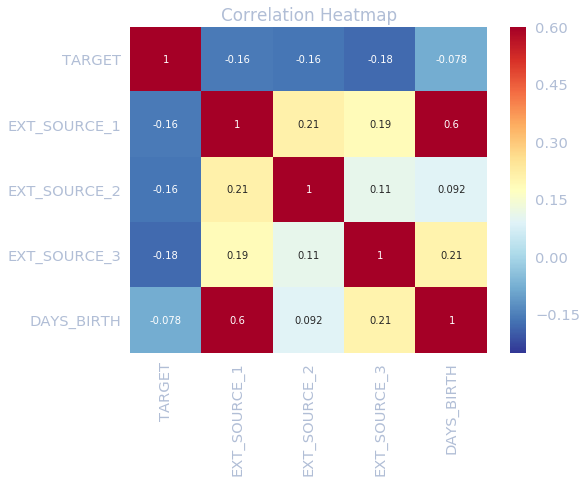

In [37]:
plt.figure(figsize=(8,6))

sns.heatmap(ext_data_corrs,cmap=plt.cm.RdYlBu_r,annot=True,vmin=-0.25,vmax=0.6)
plt.title('Correlation Heatmap')

All the three external variable have **negative** correlation with the target variable. This indicate that asthe value of this *EXT_SOURCE* increases, the client is more likely to repay the loan.

Now we can look at the distribution of each of these colored by value.

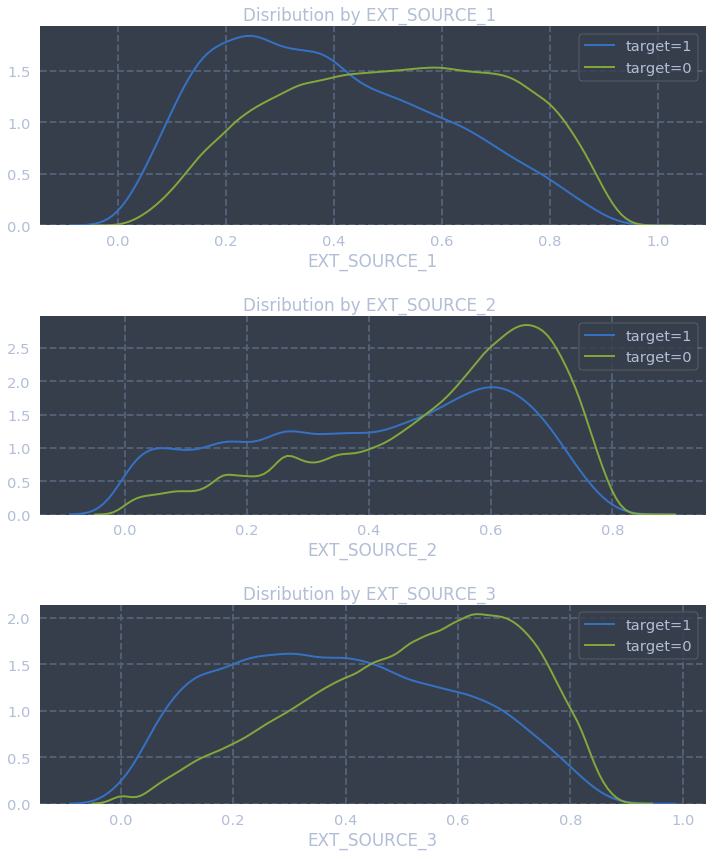

In [41]:
plt.figure(figsize=(10,12))

#iterate throught the sources
for i,  source in enumerate(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']):
    #create a suplot for each source
    plt.subplot(3,1,i+1)
    
    #plot the repaind loans
    sns.kdeplot(app_train.loc[app_train['TARGET']==1,source],label='target=1')
    sns.kdeplot(app_train.loc[app_train['TARGET']==0,source],label='target=0')

    plt.title('Disribution by {} '.format(source))
    plt.xlabel(source)
plt.tight_layout(h_pad=2.5)
    

the feature *EXT_SOURCE_3* displas the greatest difference between the values of the target.

### Par plots
As a final exploratory plot, we can make  a pair of the *EXT_SOURCES* and the *DAYS_BIRTH* variable.

AttributeError: Unknown property cmap

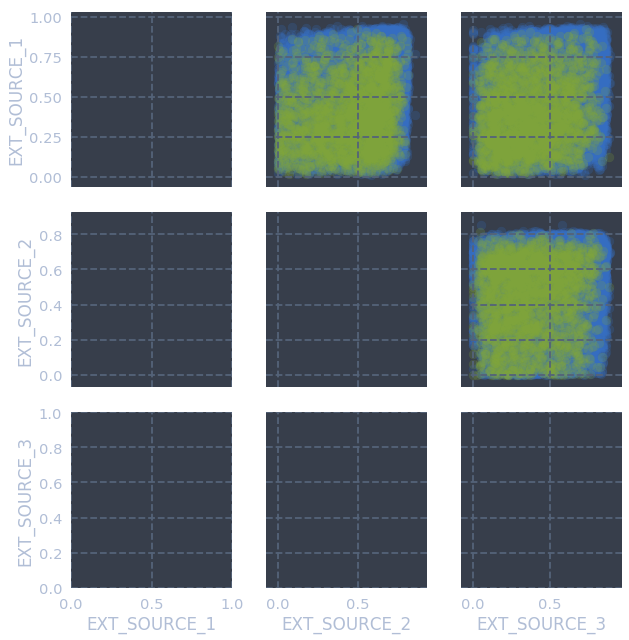

In [52]:
#copy the data for plotting
plot_data = ext_data.drop(columns=['DAYS_BIRTH']).copy()

#add the age of the client in years

#drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000,:]

#function to calculate the correlation ceofficient between two columns

def corr_func(x, y ,**kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".fromat(r),\
              xy=(0.2,0.8),xycoords=ax.transAxes, size=20)
    

grid = sns.PairGrid(data=plot_data,size=3, diag_sharey=False\
                       ,hue='TARGET',\
                       vars = [x for x in list(plot_data.columns) if x !='TARGET'])

#upper diagonal
grid.map_upper(plt.scatter, alpha=0.2)

#main diagonal
grid.map_diag(sns.kdeplot)

#Bottom diagonal
grid.map_lower(sns.kdeplot, cmap=plt.cm.OrRd_r)